# Bathymetry closeup - Dec 2018

Investigate changes in bathymetry and compare to gebco.

See https://github.com/OceansAus/access-om2/issues/99

and https://github.com/OceansAus/access-om2/issues/126


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import netCDF4 as nc
import IPython.display

In [2]:
# file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'

# see https://github.com/OceansAus/access-om2/issues/99
# and https://github.com/OceansAus/access-om2/issues/126
# badbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_10_17_yenesei.nc'

origbathyfile = 'input_38570c62_mom_01deg_topog.nc' # used for all recent RYF and IAF - contains terraces and Severny seamount and small cells - cp /short/public/access-om2/input_38570c62/mom_01deg/topog.nc /g/data/v45/aek156/notebooks/github/aekiss/notebooks/input_38570c62_mom_01deg_topog.nc
nicbathyfile = 'input_eee21b65_mom_01deg_topog.nc' # Nic's topog - eliminates terraces and Severny seamount but contains small cells, from cp /short/public/access-om2/input_eee21b65/mom_01deg/topog.nc /g/data/v45/aek156/notebooks/github/aekiss/notebooks/input_eee21b65_mom_01deg_topog.nc
# fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_06_2018.baffin.nc'
# fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_06_2018.baffin.nc'
russbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_12_2018_min_dyt.nc' # Russ' topog - eliminates terraces and Severny seamount and small cells


origdepth = nc.Dataset(origbathyfile).variables['depth'][:,:]
nicdepth = nc.Dataset(nicbathyfile).variables['depth'][:,:]
russdepth = nc.Dataset(russbathyfile).variables['depth'][:,:]

file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
data2 = nc.Dataset(file2)
lons = data2.variables['x'][::2,::2]
lats = data2.variables['y'][::2,::2]

In [4]:
# location of point of interest as reported by MOM (indexing from 1 presumably)

# Error: temperature out of range with value     5.579899101702E+01 at (i,j,k) = (2153,2093,  3),  (lon,lat,dpt) = (  -64.7500,   64.3310,    3.0106 m)
# This location is at the coast on the southern side of the mouth of Cumberland Sound on the east coast of Baffin Island:
# <https://www.google.com.au/maps/place/64.3310N+64.7500W/>
i = 2153
j = 2093

margin = 40

In [5]:
# adjust to suit 0-starting index (assuming MOM reports indexing from 1)
i -= 1
j -= 1
print('depth('+str(i)+','+str(j)+')='+str(depth[j,i]))

depth(2152,2092)=--


In [6]:
jgebco = (np.abs(gebcolat - lats[j,i])).argmin()
igebco = (np.abs(gebcolon - lons[j,i])).argmin()

jgebcoa = (np.abs(gebcolat - lats[j-margin,i-margin])).argmin()
igebcoa = (np.abs(gebcolon - lons[j-margin,i-margin])).argmin()

jgebcob = (np.abs(gebcolat - lats[j+margin,i+margin])).argmin()
igebcob = (np.abs(gebcolon - lons[j+margin,i+margin])).argmin()

igebcomin = min(igebcoa, igebcob)
jgebcomin = min(jgebcoa, jgebcob)
igebcomax = max(igebcoa, igebcob)
jgebcomax = max(jgebcoa, jgebcob)

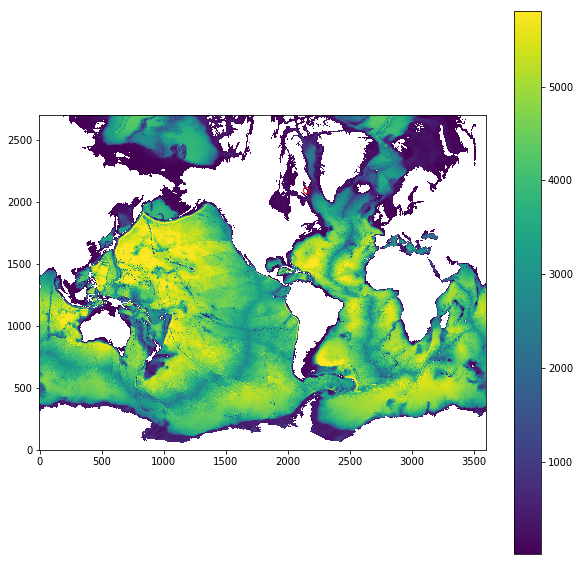

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(depth, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r');

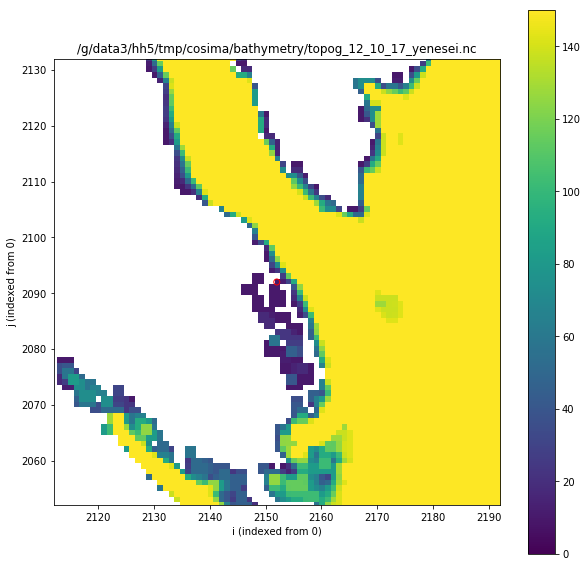

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(baddepth, vmin=0, vmax=150, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

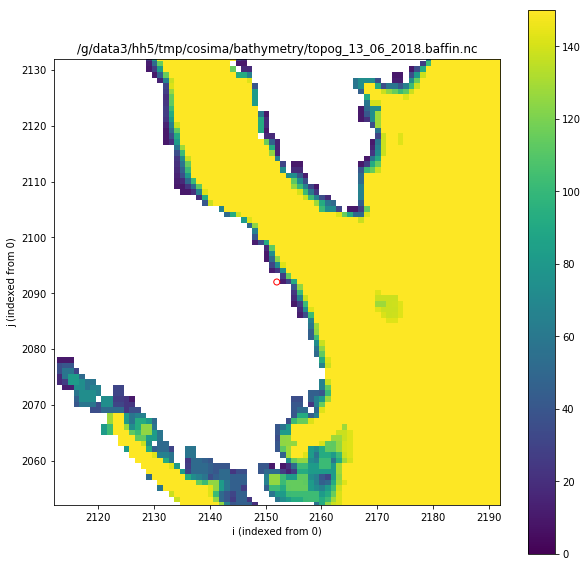

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(depth, vmin=0, vmax=150, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

In [10]:
gebcodepthplot = gebcodepth[jgebcomin:jgebcomax,igebcomin:igebcomax]
# gebcodepthplot[gebcodepthplot<0.0] = np.float64(np.nan)

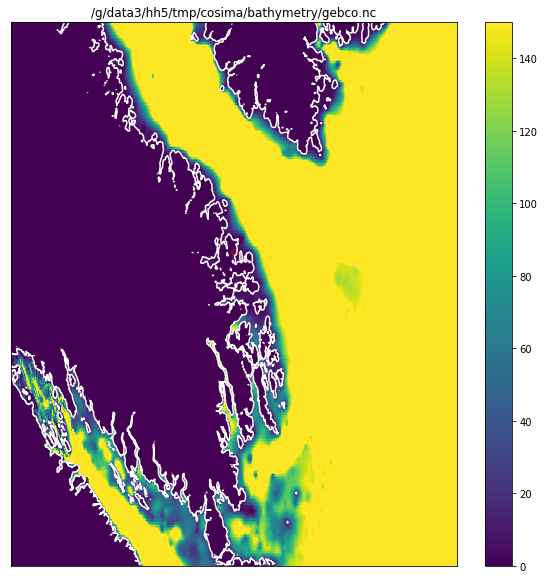

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(gebcodepthplot, vmin=0, vmax=150, origin='lower',aspect='auto')
plt.colorbar()
plt.contour(gebcodepthplot,[0],colors='w')
plt.scatter(igebco-igebcomin,jgebco-jgebcomin, facecolors='none', edgecolors='r')
plt.title(gebcofile)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([]);
# plt.xlabel('i')
# plt.ylabel('j')

## Changes in bathymetry (apart from landmask)
see https://github.com/OceansAus/access-om2/issues/99

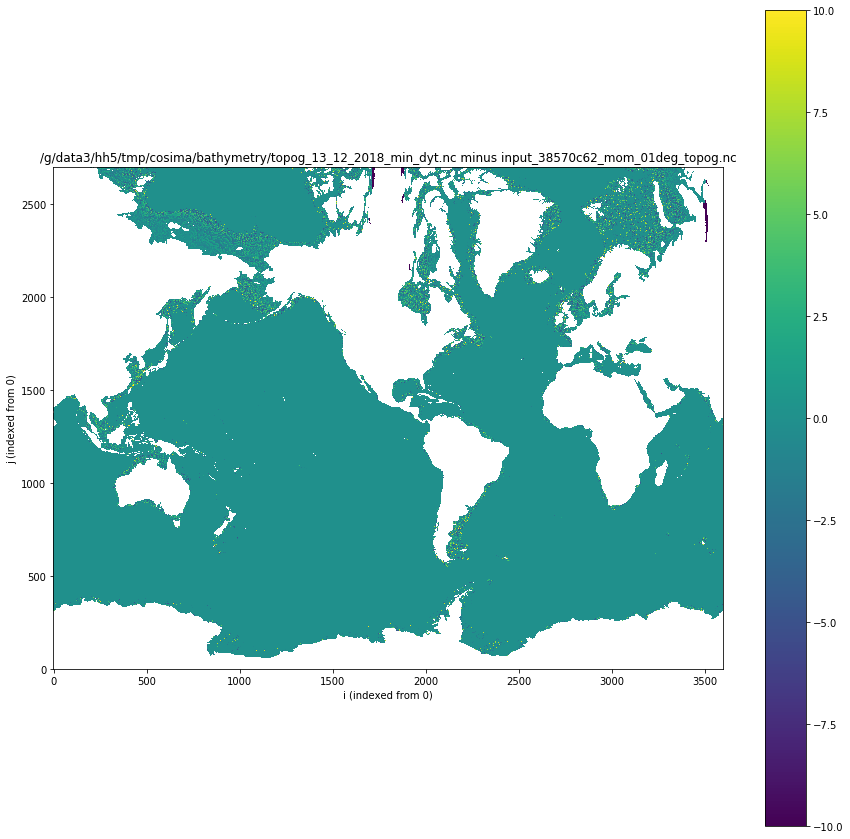

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(russdepth-origdepth,  vmin=-10, vmax=10, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(russbathyfile+' minus '+origbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

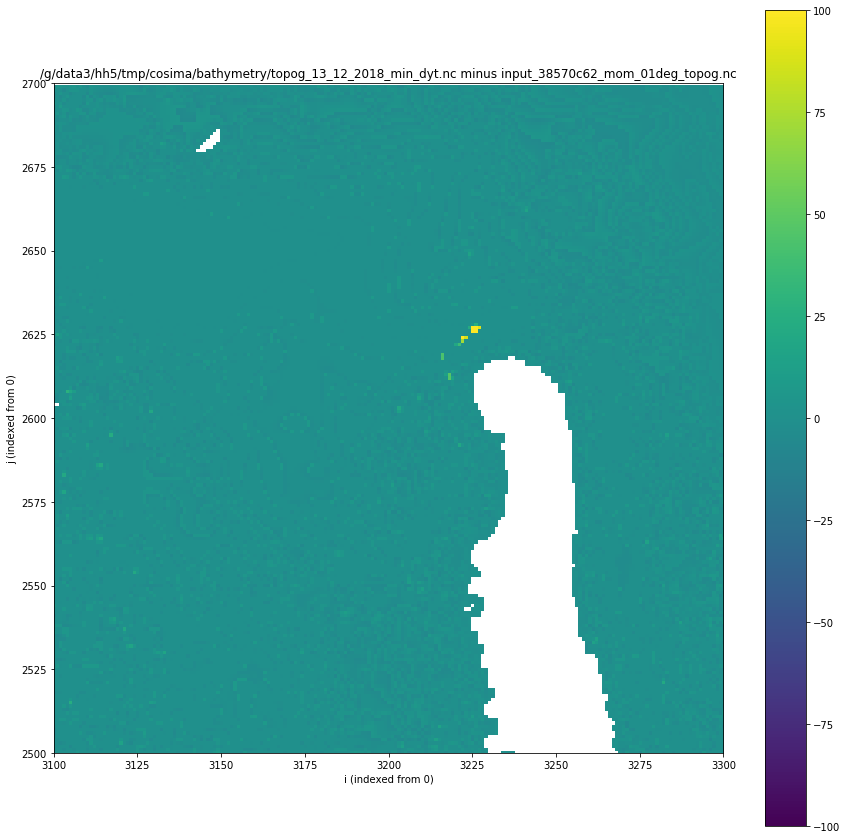

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(russdepth-origdepth,  vmin=-100, vmax=100, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(3100,3300)
plt.ylim(2500,2700)
plt.title(russbathyfile+' minus '+origbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

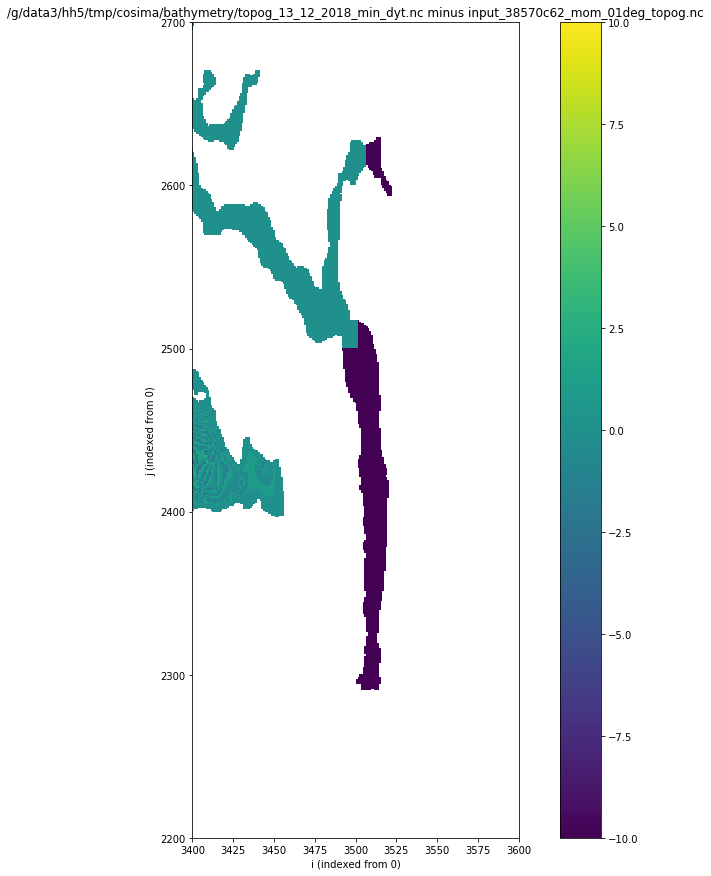

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(russdepth-origdepth,  vmin=-10, vmax=10, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(3400,3600)
plt.ylim(2200,2700)
plt.title(russbathyfile+' minus '+origbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

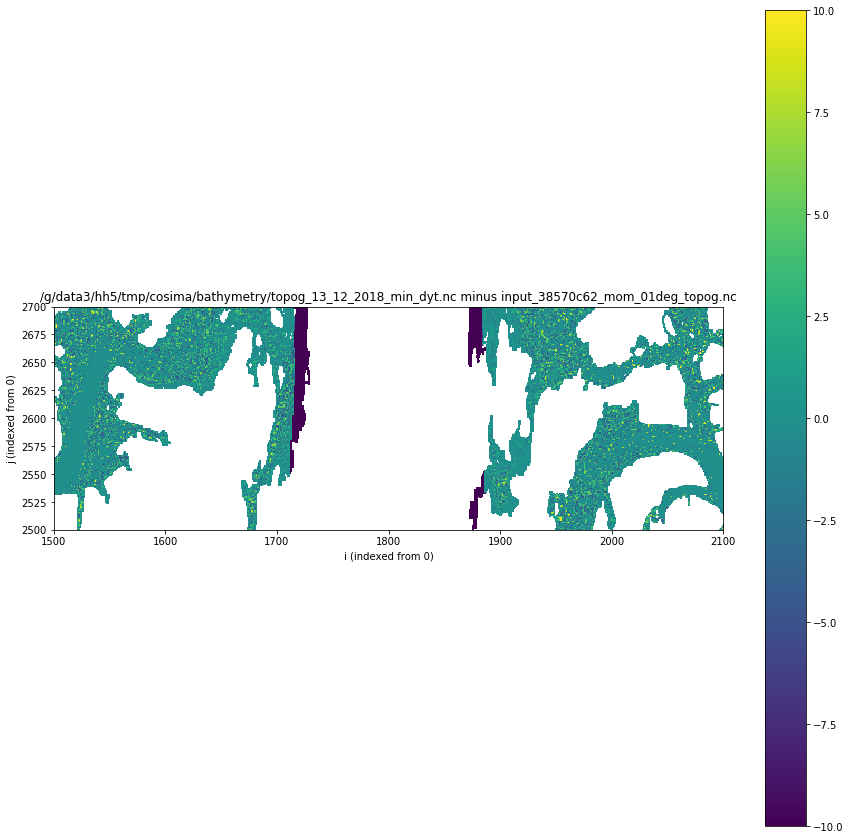

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(russdepth-origdepth,  vmin=-10, vmax=10, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(1500,2100)
plt.ylim(2500,2700)
plt.title(russbathyfile+' minus '+origbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

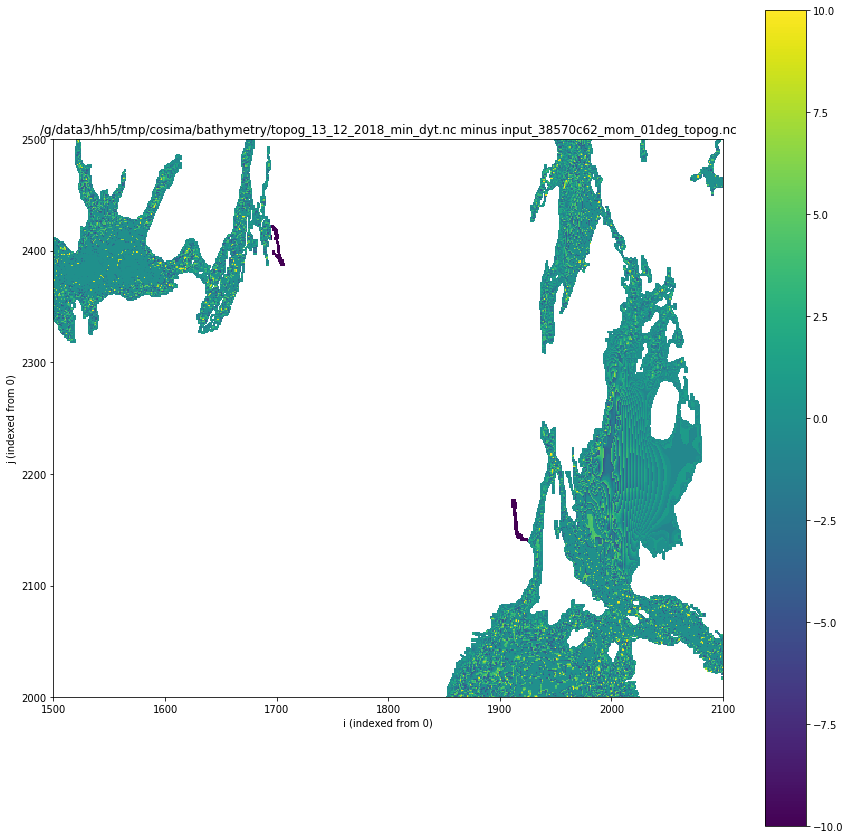

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(russdepth-origdepth,  vmin=-10, vmax=10, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(1500,2100)
plt.ylim(2000,2500)
plt.title(russbathyfile+' minus '+origbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

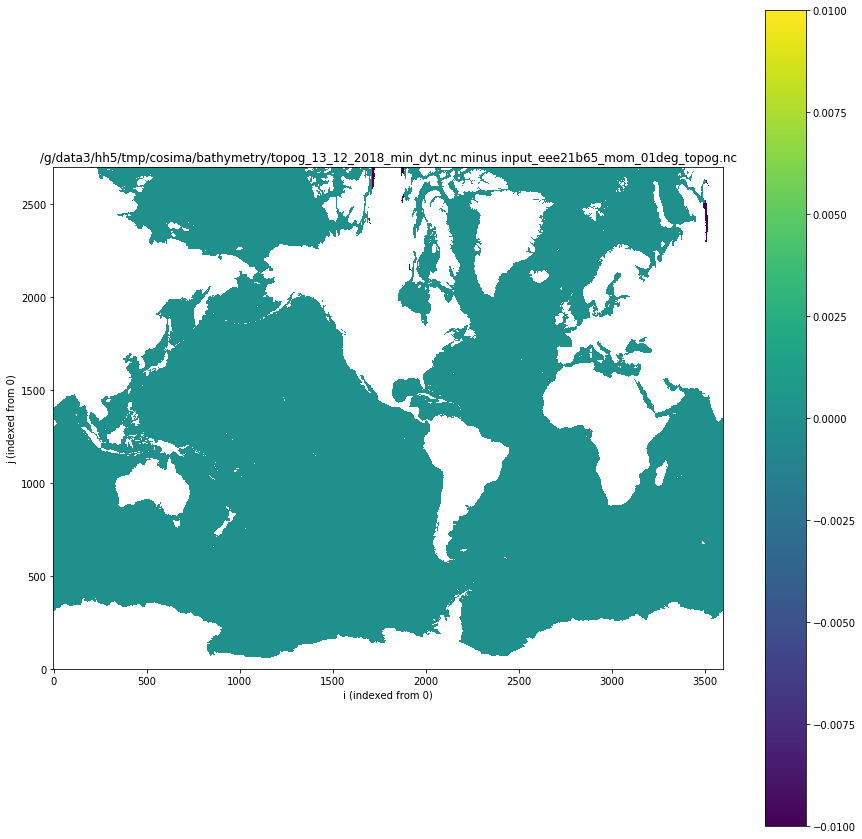

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(depth-baddepth,  vmin=-.01, vmax=.01, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile+' minus '+badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

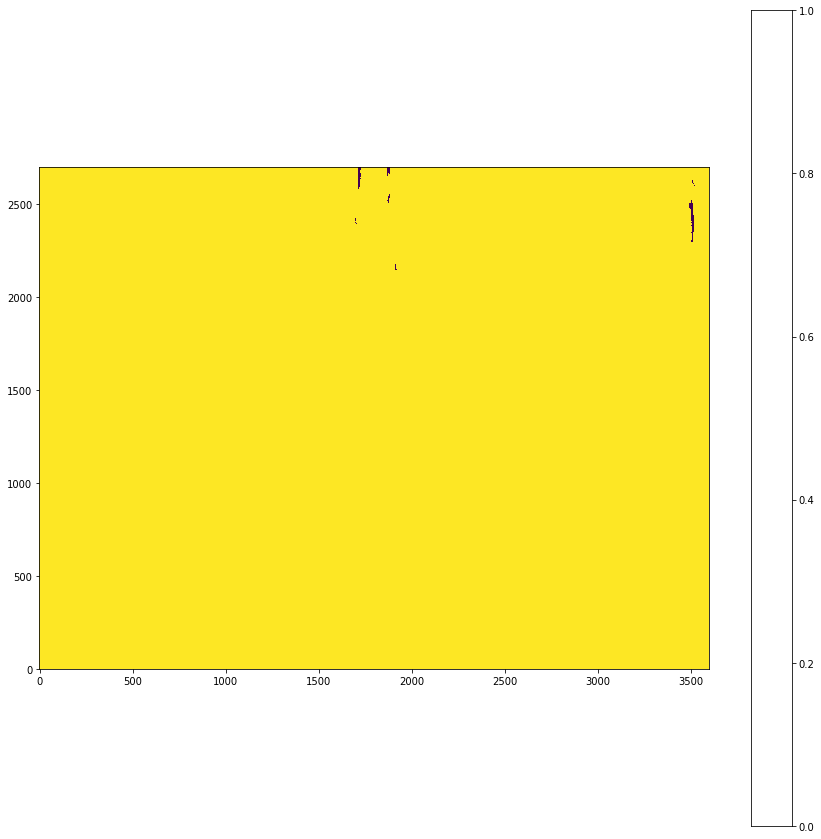

In [3]:
depthchange = depth-baddepth
# change mask so we don't plot points with zero depth change
depthchange.mask = np.ma.mask_or(np.ma.getmask(depthchange),np.ma.make_mask(depthchange==0))

plt.figure(figsize=(15,15))
plt.imshow(depthchange.mask, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile+' minus '+badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

plt.figure(figsize=(15,15))
plt.imshow(depthchange, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile+' minus '+badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

All depth changes are negative, i.e. ocean is filled in. Most changes are small. 5892 non-masked points changed (0.05%).

In [4]:
np.ma.max(depth-baddepth)

0.0

In [5]:
np.ma.max(depthchange)

-1.0

In [6]:
np.ma.min(depthchange)

-175.33333

In [7]:
np.ma.mean(depthchange)

-21.478572640868975

In [8]:
np.ma.median(depthchange)

-10.432805061340332

In [9]:
np.ma.count(depthchange)

5892

In [10]:
np.shape(depthchange)

(2700, 3600)

In [11]:
np.ma.count(depthchange)/(2700*3600)

0.0006061728395061728

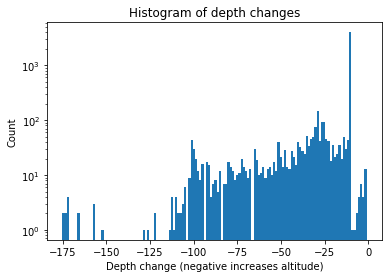

In [12]:
plt.hist(np.ma.ravel(depthchange), bins=140, log=True);
plt.xlabel('Depth change (negative increases altitude)')
plt.ylabel('Count');
plt.title('Histogram of depth changes');

### Landmask change
+1 = land added; -1= land removed.

There has been no land removed. There are 180 more land points, 108 on Hall Peninsula, Baffin Island.

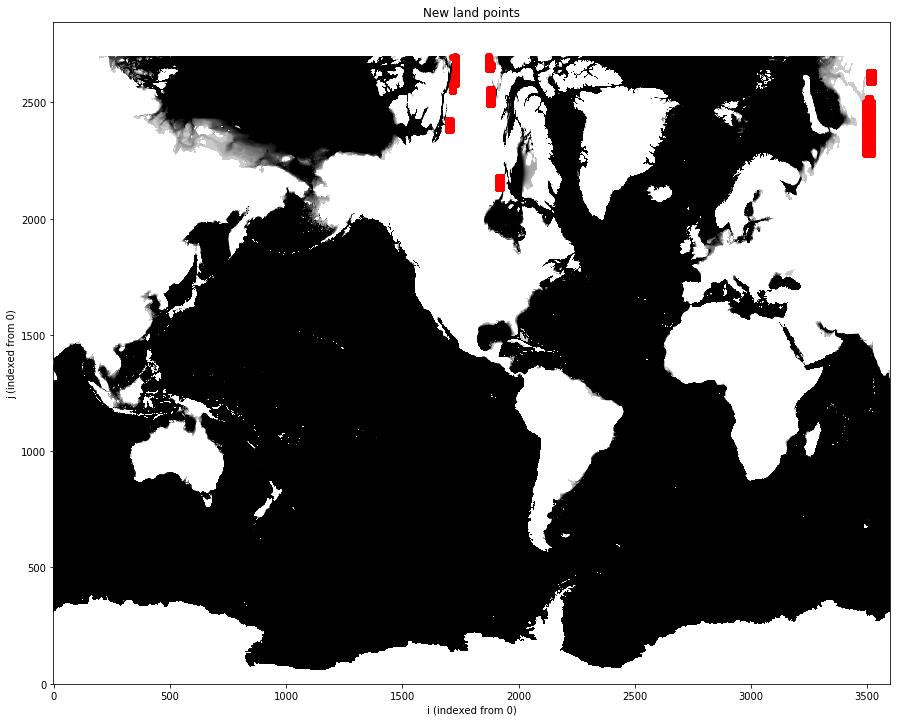

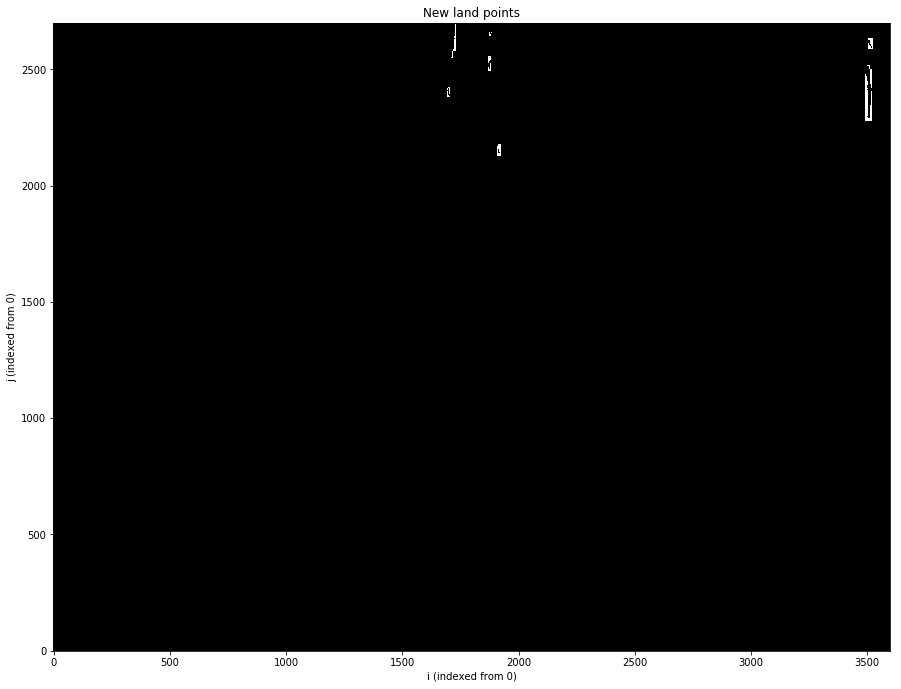

In [14]:
maskdiff = np.ma.getmask(depth).astype(int)-np.ma.getmask(baddepth).astype(int)
jj,ii=np.nonzero(maskdiff)

# plt.figure(figsize=(15,15))
# plt.imshow(maskdiff, origin='lower')
# plt.colorbar()
# # plt.scatter(jj,ii, facecolors='none', edgecolors='w')
# plt.title('New land points')
# plt.xlabel('i (indexed from 0)')
# plt.ylabel('j (indexed from 0)');

plt.figure(figsize=(15,15))
plt.imshow(depth, vmin=0, vmax=50, origin='lower', cmap=cm.binary)
plt.scatter(ii,jj, facecolors='r', edgecolors='r')
# plt.xlim(min(ii)-margin,max(ii)+margin)
# plt.ylim(min(jj)-margin,max(jj)+margin)
plt.title('New land points')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

plt.figure(figsize=(15,15))
plt.imshow(maskdiff, origin='lower', cmap=cm.binary)
# plt.xlim(min(ii)-margin,max(ii)+margin)
# plt.ylim(min(jj)-margin,max(jj)+margin)
plt.title('New land points')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');


In [15]:
np.ma.min(maskdiff)

-1

In [16]:
np.count_nonzero(maskdiff)

7636

In [17]:
np.count_nonzero(maskdiff[j-margin:j+margin,i-margin:i+margin])

NameError: name 'j' is not defined